# Project 1 - Mall-Customer-Segmentation

In [360]:

#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [361]:
#import data
Mall_Customer_Segmentation = pd.read_csv("Data Scientest Nanoodegree\Project 1\Mall-Customer-Segmentation.csv")

### Data Exploring

In [362]:
num_rows_Mall_Customer_Segmentation = Mall_Customer_Segmentation.shape[0]
num_columns_Mall_Customer_Segmentation = Mall_Customer_Segmentation.shape[1]
print('There are {} rows and {} Columns'.format(num_rows_Mall_Customer_Segmentation,num_columns_Mall_Customer_Segmentation))

There are 200 rows and 5 Columns


In [363]:
Mall_Customer_Segmentation.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [364]:
Mall_Customer_Segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [365]:
# values checking
Mall_Customer_Segmentation.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [366]:
# Checking for any Missing Values

missing_val =Mall_Customer_Segmentation.isnull().sum(axis=0).reset_index()
missing_val.columns = ['Column', 'Total Missing Values']
missing_val['Filling %']=(Mall_Customer_Segmentation.shape[0]-missing_val['Total Missing Values'])/Mall_Customer_Segmentation.shape[0]*100

#This sorts the DataFrame based on the 'Filling Factor (%)' column in ascending order
missing_val.sort_values('Filling %').reset_index(drop = True)


,Column,Total Missing Values,Filling %
0,CustomerID,0,100.0
1,Gender,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


### Transform object column

In [367]:
la= LabelEncoder()

In [368]:
# Data type tran. whitout creating a new column
# Converted Gender into numerical values: Male = 1, Female = 0.
Mall_Customer_Segmentation.Gender=la.fit_transform(Mall_Customer_Segmentation.Gender)
Mall_Customer_Segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### Modeling

In [369]:
clusters_num=[]
j=[] #errors num or %

In [370]:
#K-Means Clustering Method
#i is clusters num
for i in range(1,12):
    model=KMeans(n_clusters=i)   
    model.fit(Mall_Customer_Segmentation)
    clusters_num.append(i)
    j.append(model.inertia_)

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

In [371]:
pd.DataFrame(clusters_num,j)

,0
975512.060000,1
387065.713771,2
271396.562966,3
195401.198560,4
157505.720725,5
122608.337800,6
103233.097885,7
86053.674448,8
76894.301576,9
68993.429124,10


Text(0, 0.5, 'Errors')

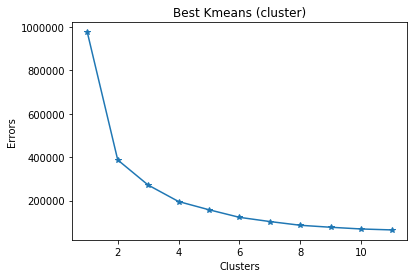

In [372]:
#Elbow Method
plt.plot(clusters_num,j,marker='*')
plt.title('Best Kmeans (cluster)')
plt.xlabel('Clusters')
plt.ylabel('Errors')

In [373]:
# taking i = 5
model=KMeans(n_clusters=5)

# fitting the input data
model.fit(Mall_Customer_Segmentation)
pre=model.predict(Mall_Customer_Segmentation)

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

In [374]:
Mall_Customer_Segmentation['K_M']=pre #KMean
Mall_Customer_Segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_M
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,1
197,198,1,32,126,74,2
198,199,1,32,137,18,1


In [375]:
df1=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==0]
df2=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==1]
df3=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==2]
df4=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==3]
df5=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==4]

## What is the relationship between Annual Income and Spending Score?

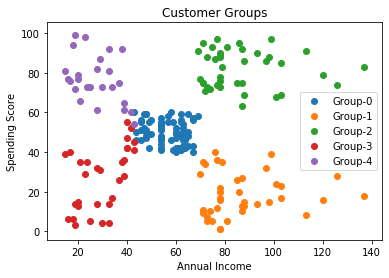

In [376]:
# scatterplot of the clusters
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group-0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group-1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group-2')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group-3')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],label='Group-4')


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()

The clustering analysis provides us with a very clear insight into the different customer segments at the mall.

It is evident that there are five customer segments: Group 1, Group 2, Group 3, Group 4, and Group 5 based on their annual income and spending score, which are said to be the best factors/features for determining customer segments at the mall.

## Which cluster is the largest in the dataset?

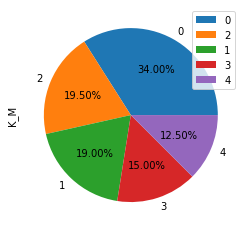

In [377]:
Mall_Customer_Segmentation['K_M'].value_counts().plot.pie(autopct='%0.2f%%') #cluster 3 is the biggest one with 32.5%

plt.legend()

Identifying the largest cluster is pivotal in customer segmentation analysis as it directs strategic focus towards the predominant customer group for tailored marketing and operational optimization.

## What is the spending Score per each cluster

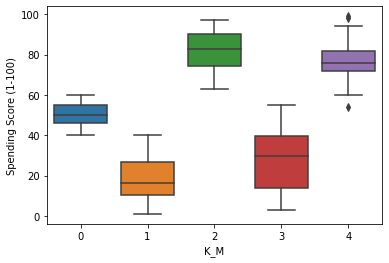

In [378]:
sns.boxplot(Mall_Customer_Segmentation['K_M'], Mall_Customer_Segmentation['Spending Score (1-100)'])

## How is gender distributed across each cluster?

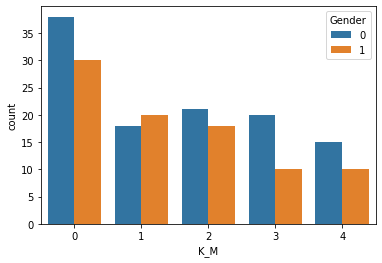

In [379]:
sns.countplot(Mall_Customer_Segmentation.K_M,hue=Mall_Customer_Segmentation.Gender)

## Who is more numerous, females or males?

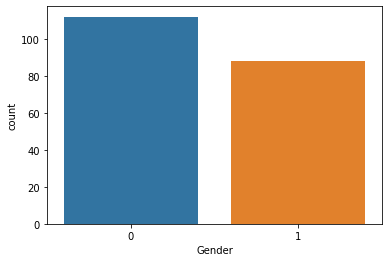

In [380]:
sns.countplot(data=Mall_Customer_Segmentation, x='Gender')

There are more women than men in this dataset.

## Age distribution

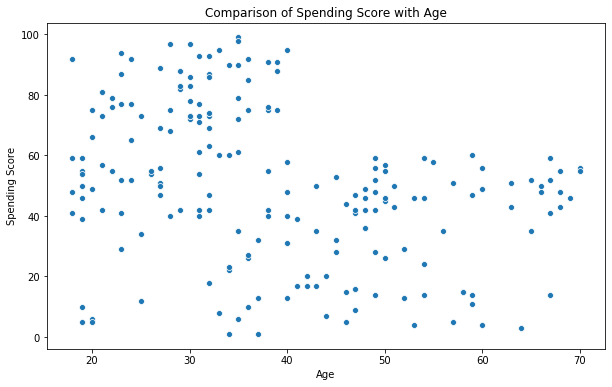

In [381]:
# Create a scatter plot to compare 'Age' and 'Spending Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=Mall_Customer_Segmentation)
plt.title('Comparison of Spending Score with Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

The above plot shows the negative correlation between age and spending score. It's not a strong association, but the older the person, the worse their spending score.